# Exploring your data with unsupervised machine learning


![](http://scikit-learn.org/stable/_static/ml_map.png)

## Dimensionality reduction

Dimensionality reduction algorithms like PCA, ICA, MDS, t-SNE (we'll get into the acronyms in a second) are all trying to accomplish the same thing: *smush your high dimensional data into a palatable number of dimensions* (often <10).


### Manifold learning dimensionality reduction: MDS and t-SNE



In [5]:
cmap = plt.cm.viridis

# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

print(__doc__)

import scipy
from time import time
import warnings

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

def compare_mds_tsne(n_points=1000, random_state=0, stddev=0, metric='euclidean', tsne_init='pca'):
#     n_points = 2000
    X, sample_order = datasets.samples_generator.make_s_curve(n_points, random_state=0)

    if stddev > 0:
        X = X + np.random.normal(size=np.product(X.shape), scale=0.1).reshape(X.shape)
        

    fig = plt.figure(figsize=(12, 4))
    plt.suptitle("Manifold Learning with %i points" % (n_points))
    
    # Plot original data
    ax = fig.add_subplot(131, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=sample_order, cmap=cmap)
    ax.view_init(4, -72)

    # Add noise if necessary
    n_components = 2
    smusher_kws = dict(n_components=n_components, random_state=random_state)
    tsne_kws = dict(init=tsne_init)
    
    if metric != 'euclidean':
        X = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(X, metric=metric))
        smusher_kws['metric'] = 'precomputed'
        
        warnings.warn('FYI not initializing t-SNE with PCA since distances are precomputed')
        tsne_kws.pop('init')
    tsne_kws.update(smusher_kws)
    

    # Perform MDS and plot it
    t0 = time()
    mds = manifold.MDS(max_iter=100, n_init=1, **smusher_kws)
    Y = mds.fit_transform(X)
    t1 = time()
    print("MDS: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(1, 3, 2)
    plt.scatter(Y[:, 0], Y[:, 1], c=sample_order, cmap=cmap)
    plt.title("MDS (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    # Perform t-SNE and plot it
    t0 = time()
    tsne = manifold.TSNE(**tsne_kws)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("t-SNE: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(1,3,3)
    plt.scatter(Y[:, 0], Y[:, 1], c=sample_order, cmap=cmap)
    plt.title("t-SNE (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    plt.show()
    


Automatically created module for IPython interactive environment


MDS: 2.5 sec
t-SNE: 3.3 sec


/Users/olga/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


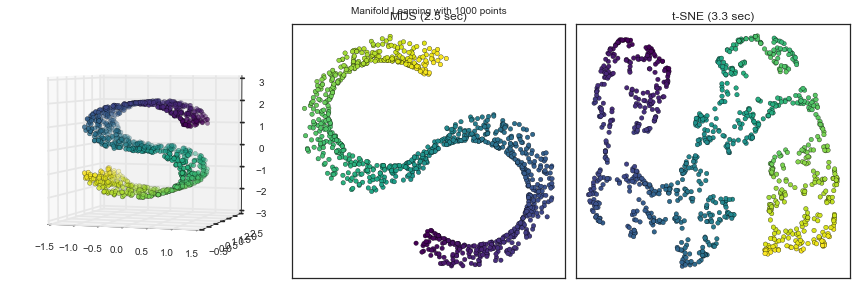

In [13]:

ipywidgets.interact(compare_mds_tsne, metric=['euclidean', 'cityblock', 'seuclidean', 'sqeuclidean', 'correlation'], 
                    tsne_init=['random', 'pca'], n_points=ipywidgets.IntSlider(value=1000, min=50, max=2000, step=50),
                    random_state=ipywidgets.IntSlider(value=0, min=0, max=10),
                    stddev=ipywidgets.FloatSlider(value=0, min=0, max=1, description='Add Noise'));

In [7]:
manifold.TSNE()

TSNE(angle=0.5, early_exaggeration=4.0, init='random', learning_rate=1000.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=30,
   perplexity=30.0, random_state=None, verbose=0)

In [8]:
scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(X))

array([[ 0.        ,  2.14088995,  1.35780511, ...,  3.40809004,
         3.37963444,  4.63971911],
       [ 2.14088995,  0.        ,  0.86543971, ...,  3.27145552,
         3.6950729 ,  6.46299516],
       [ 1.35780511,  0.86543971,  0.        , ...,  3.42760865,
         3.68741238,  5.60778458],
       ..., 
       [ 3.40809004,  3.27145552,  3.42760865, ...,  0.        ,
         0.75552579,  7.76371128],
       [ 3.37963444,  3.6950729 ,  3.68741238, ...,  0.75552579,
         0.        ,  7.46345184],
       [ 4.63971911,  6.46299516,  5.60778458, ...,  7.76371128,
         7.46345184,  0.        ]])

The left shows the original data in three dimensions, a flat sheet that was folded into an "S"-curve.

The middle plot shows the three-dimensional data smushed to two dimensions using MDS. Notice that it maintains the exact shape of the curve

## Hierarchical clustering

### Distance metrics: Euclidean vs Manhattan
One important point of how you cluster data is which distance metric you use.

- Euclidean distance is what you learned in algebra class: $\sqrt{x^2 + y^2}$, but all the way to $N$ dimensions: $\sqrt{\sum_i^N x_i^2}$
- Manhattan distance (also called "taxicab geometry")

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/2000px-Manhattan_distance.svg.png)

### Linkage methods: Ward, average, single, complete

In [9]:
import seaborn as sns

sns.clustermap?